# Visualization of dataset(test_data)
## Dot & heapmap diagram
This section will develop a structural and content analysis of the data. The final conclusion is that the data are sparse

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# open up a datastore
store = pd.HDFStore('data/test_data.h5')
storeTrain = pd.HDFStore('data/train_data.h5')
print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: data/test_data.h5
/accessions              series       (shape->[2855])      
/gene_symbols            series       (shape->[1])         
/labels                  series       (shape->[1])         
/rpkm                    frame        (shape->[2855,20499])
/true_ids                series       (shape->[1])         


## basic structure 

In [3]:
store.keys() # show all keys in h5 dataset

['/accessions', '/gene_symbols', '/labels', '/rpkm', '/true_ids']

In [4]:
store['rpkm'].keys() 

Int64Index([100009600, 100009609, 100009614,    100012,    100017,    100019,
            100033459, 100034251, 100034361, 100034363,
            ...
                99709,     99712,     99730,     99738,     99887,     99889,
                99890,     99899,     99929,     99982],
           dtype='int64', length=20499)

## Special features of HDF5 structure
Tree-like structure and multiple items pointing to the same data set

In [4]:
store['labels'].index[0] == store['rpkm'].index[0]

True

In [5]:
print(store['labels'])
print(type(store['labels']))
print(store['labels'][0])
print(store['labels'].values)


# /labels         Vector, same length as number of rows in 'rpkm', contains the correct label (cell type) for each cell.

22182_GSM552335_SRR057552      CL:0000353 blastoderm cell
22182_GSM552337_SRR057554      CL:0000353 blastoderm cell
22182_GSM552339_SRR057556      CL:0000353 blastoderm cell
22182_GSM552340_SRR057557      CL:0000353 blastoderm cell
22182_GSM552341_SRR057558      CL:0000353 blastoderm cell
                                          ...            
98048_GSM2586152_SRR5464789           UBERON:0002048 lung
98048_GSM2586155_SRR5464792           UBERON:0002048 lung
98048_GSM2586156_SRR5464793           UBERON:0002048 lung
98048_GSM2586159_SRR5464796           UBERON:0002048 lung
98048_GSM2586160_SRR5464797           UBERON:0002048 lung
Length: 2855, dtype: object
<class 'pandas.core.series.Series'>
CL:0000353 blastoderm cell
['CL:0000353 blastoderm cell' 'CL:0000353 blastoderm cell'
 'CL:0000353 blastoderm cell' ... 'UBERON:0002048 lung'
 'UBERON:0002048 lung' 'UBERON:0002048 lung']


In [6]:
store['gene_symbols']


# /gene_symbols   Might not be useful. Vector, same length as number of columns in 'rpkm', contains the names (strings) 
#                 for each gene. Just a different way of identifying the genes.

100009600      zglp1
100009609    vmn2r65
100009614    gm10024
100012          oog3
100017       ldlrap1
              ...   
99889         arfip1
99890          prmt6
99899          ifi44
99929         tiparp
99982          kdm1a
Length: 20499, dtype: object

In [7]:
store['accessions']


# /accessions     This is a vector of the same length as number of rows in 'rpkm' and contains the experimentID (accession) for
#                 each cell. This is actually embedded in the unique identifier for the cell, but is included as a separate vector
#                 for convenience.

22182_GSM552335_SRR057552      22182
22182_GSM552337_SRR057554      22182
22182_GSM552339_SRR057556      22182
22182_GSM552340_SRR057557      22182
22182_GSM552341_SRR057558      22182
                               ...  
98048_GSM2586152_SRR5464789    98048
98048_GSM2586155_SRR5464792    98048
98048_GSM2586156_SRR5464793    98048
98048_GSM2586159_SRR5464796    98048
98048_GSM2586160_SRR5464797    98048
Length: 2855, dtype: int64

## rpkm Data
mainly focused, yet need further improve

In [8]:
rawData = store['rpkm'] # dataframe
store['rpkm']

# /rpkm           This contains the data. Each row is a single cell. Each column is the expression of a gene in RPKM units.
#                 The "index" (the row names, primary key of the table) is a unique identifier for each cell. 
#                 The column names are Entrez IDs, which are unique numerical identifiers for genes.

,100009600,100009609,100009614,100012,100017,100019,100033459,100034251,100034361,100034363,...,99709,99712,99730,99738,99887,99889,99890,99899,99929,99982
22182_GSM552335_SRR057552,1.840836,0.000000,0.0,14.814862,0.094549,0.260916,0.023245,0.059217,1.363372,0.019920,...,0.037522,0.090834,3.403379,0.0,0.277131,0.155569,9.740831,0.042179,0.854264,0.498736
22182_GSM552337_SRR057554,1.953578,0.002191,0.0,4.801455,0.136273,0.231416,0.000000,0.000000,1.531225,0.033408,...,0.021783,0.106042,2.426503,0.0,0.150539,0.085527,6.029271,0.053055,0.736165,0.388729
22182_GSM552339_SRR057556,1.307871,0.005973,0.0,11.413175,0.121601,0.246245,0.000000,0.000000,1.137963,0.060727,...,0.032997,0.071944,2.870108,0.0,0.217200,0.075764,5.250086,0.066972,0.705067,0.339897
22182_GSM552340_SRR057557,1.496004,0.004818,0.0,26.520896,0.121690,0.350972,0.000000,0.000000,1.916919,0.165307,...,0.018630,0.242509,3.340137,0.0,0.121388,0.146025,10.222354,0.070222,0.596856,0.533621
22182_GSM552341_SRR057558,2.186350,0.002640,0.0,2.944039,0.293644,0.319084,0.003132,0.000000,2.157199,0.026843,...,0.014586,0.079804,2.849073,0.0,0.160268,0.092642,5.446414,0.098285,0.427717,0.791858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048_GSM2586152_SRR5464789,0.000000,0.000000,0.0,0.000000,0.000000,1.118867,0.000000,0.000000,1.564234,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.206261,0.000000,0.000000,0.000000,1.672558
98048_GSM2586155_SRR5464792,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.676967,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.698528,0.000000,0.000000,0.000000,0.169930
98048_GSM2586156_SRR5464793,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.643832,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.752122,0.000000,0.000000,2.513537,0.000000
98048_GSM2586159_SRR5464796,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.033025,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
storeTrain['rpkm']

,100009600,100009609,100009614,100012,100017,100019,100033459,100034251,100034361,100034363,...,99709,99712,99730,99738,99887,99889,99890,99899,99929,99982
45719_GSM1112514_SRR805197,0.000000,0.008907,0.0,0.0,0.060442,1.263215,0.000000,0.000000,8.286854,0.000000,...,0.009841,1.086961,1.155334,0.0,0.038253,0.008803,0.036697,0.197734,0.000000,0.588930
45719_GSM1112529_SRR805212,0.044703,0.000000,0.0,0.0,0.021166,0.863185,0.000000,0.000000,8.073047,0.000000,...,0.004135,0.576715,0.911917,0.0,6.533028,0.384743,0.000000,0.327343,0.274643,0.986356
45719_GSM1112532_SRR805215,0.000000,0.000000,0.0,0.0,0.260835,0.730764,0.000000,0.000000,1.404534,0.000000,...,0.027869,0.535570,2.487480,0.0,0.625243,0.005342,0.000000,0.038787,0.264409,2.344540
45719_GSM1112537_SRR805220,1.055334,0.006025,0.0,0.0,2.108925,0.735293,0.003574,0.000000,3.465954,0.000000,...,0.013313,0.548348,4.811238,0.0,0.059513,0.031262,2.060254,0.239130,0.970633,0.695323
45719_GSM1112539_SRR805222,2.282707,0.014426,0.0,0.0,0.020393,0.688210,0.000000,0.000000,1.817828,0.000000,...,0.011953,0.007376,5.564495,0.0,0.343837,0.007129,0.029716,0.325089,0.000000,0.457821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98969_GSM2629438_SRR5570914,2.844821,0.027860,0.0,0.0,0.012603,0.154715,0.000000,0.985142,3.970216,0.392988,...,0.003078,0.263060,1.461191,0.0,0.000000,0.173473,0.103304,0.103080,0.031107,0.528509
98969_GSM2629442_SRR5570918,2.628676,0.004101,0.0,0.0,0.000000,0.240090,0.077851,0.694136,4.969801,0.000000,...,0.006042,0.205978,3.290568,0.0,0.000000,0.334417,0.000000,0.251991,0.002908,0.817803
98969_GSM2629443_SRR5570919,1.850924,0.003089,0.0,0.0,0.158974,0.035588,0.000000,0.000000,2.225850,0.000000,...,0.008533,0.133741,0.003484,0.0,0.002654,0.003053,0.000000,0.525796,0.000000,0.363962
98969_GSM2629446_SRR5570922,0.321030,0.011859,0.0,0.0,0.032189,0.038148,0.000000,0.000000,3.397756,0.000000,...,0.001310,0.186761,1.540907,0.0,0.000000,0.063293,0.009772,0.328685,0.000000,0.245784


In [9]:
indexNow = 0
replacementDict = dict()
for elementPos in range(len(store['labels'])):
    replacementDict[store['labels'].index[elementPos]] = store['labels'][elementPos]
    print("\rfinish {}/{}".format(elementPos+1, len(store['labels'])) , end = '')
print("\ndone")
    
# print(replacementDict)

finish 2855/2855
done


In [10]:
processedData = rawData.rename(index=replacementDict)
processedData

,100009600,100009609,100009614,100012,100017,100019,100033459,100034251,100034361,100034363,...,99709,99712,99730,99738,99887,99889,99890,99899,99929,99982
CL:0000353 blastoderm cell,1.840836,0.000000,0.0,14.814862,0.094549,0.260916,0.023245,0.059217,1.363372,0.019920,...,0.037522,0.090834,3.403379,0.0,0.277131,0.155569,9.740831,0.042179,0.854264,0.498736
CL:0000353 blastoderm cell,1.953578,0.002191,0.0,4.801455,0.136273,0.231416,0.000000,0.000000,1.531225,0.033408,...,0.021783,0.106042,2.426503,0.0,0.150539,0.085527,6.029271,0.053055,0.736165,0.388729
CL:0000353 blastoderm cell,1.307871,0.005973,0.0,11.413175,0.121601,0.246245,0.000000,0.000000,1.137963,0.060727,...,0.032997,0.071944,2.870108,0.0,0.217200,0.075764,5.250086,0.066972,0.705067,0.339897
CL:0000353 blastoderm cell,1.496004,0.004818,0.0,26.520896,0.121690,0.350972,0.000000,0.000000,1.916919,0.165307,...,0.018630,0.242509,3.340137,0.0,0.121388,0.146025,10.222354,0.070222,0.596856,0.533621
CL:0000353 blastoderm cell,2.186350,0.002640,0.0,2.944039,0.293644,0.319084,0.003132,0.000000,2.157199,0.026843,...,0.014586,0.079804,2.849073,0.0,0.160268,0.092642,5.446414,0.098285,0.427717,0.791858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBERON:0002048 lung,0.000000,0.000000,0.0,0.000000,0.000000,1.118867,0.000000,0.000000,1.564234,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.206261,0.000000,0.000000,0.000000,1.672558
UBERON:0002048 lung,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.676967,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.698528,0.000000,0.000000,0.000000,0.169930
UBERON:0002048 lung,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.643832,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.752122,0.000000,0.000000,2.513537,0.000000
UBERON:0002048 lung,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.033025,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Start focusing on the rpkm part
Dataframe & 2855 rows × 20499 columns

analyze the # f zero in rpkm

In [11]:
runTime = 0
zeroNumGlobal=0
zeroListX = []
zeroListY = []
dataArray = []
columnTill = 250 # Set the content covered by a line; ≤ 20499
rowTill = 250 # Set to run to several columns; ≤ 2855
for i in store['rpkm'].iterrows():
    # traverse the dataframe by row (i = tuple)
    zeroNumLocal=0
    runTime+=1
    first_column = i[1].tolist()
    dataArrayColumn = []
    # traverse the data set
    for elementIndex in range(columnTill): 
        dataArrayColumn.append(first_column[elementIndex])
        if first_column[elementIndex] == 0:
            zeroNumLocal+=1
            zeroListY.append(runTime)
            zeroListX.append(elementIndex)
    dataArray.append(dataArrayColumn)
    print("there are {} zero in {} column（the one starts at {}, with {}% local zero rate）"\
          .format(zeroNumLocal, runTime, round(first_column[0], 4),round((zeroNumLocal/columnTill)*100, 2)))
    zeroNumGlobal += zeroNumLocal
    if runTime == rowTill: 
        break
print("Totoal zero rate: ", round(zeroNumGlobal/(columnTill*runTime)*100, 3),"%")


there are 107 zero in 1 column（the one starts at 1.8408, with 42.8% local zero rate）
there are 125 zero in 2 column（the one starts at 1.9536, with 50.0% local zero rate）
there are 117 zero in 3 column（the one starts at 1.3079, with 46.8% local zero rate）
there are 111 zero in 4 column（the one starts at 1.496, with 44.4% local zero rate）
there are 103 zero in 5 column（the one starts at 2.1864, with 41.2% local zero rate）
there are 108 zero in 6 column（the one starts at 2.5553, with 43.2% local zero rate）
there are 117 zero in 7 column（the one starts at 1.4145, with 46.8% local zero rate）
there are 112 zero in 8 column（the one starts at 1.3306, with 44.8% local zero rate）
there are 113 zero in 9 column（the one starts at 0.8829, with 45.2% local zero rate）
there are 117 zero in 10 column（the one starts at 2.448, with 46.8% local zero rate）
there are 242 zero in 11 column（the one starts at 0.0, with 96.8% local zero rate）
there are 243 zero in 12 column（the one starts at 0.0, with 97.2% lo

there are 227 zero in 220 column（the one starts at 0.3879, with 90.8% local zero rate）
there are 223 zero in 221 column（the one starts at 0.3642, with 89.2% local zero rate）
there are 230 zero in 222 column（the one starts at 0.0, with 92.0% local zero rate）
there are 226 zero in 223 column（the one starts at 0.0, with 90.4% local zero rate）
there are 227 zero in 224 column（the one starts at 0.1975, with 90.8% local zero rate）
there are 229 zero in 225 column（the one starts at 0.0, with 91.6% local zero rate）
there are 228 zero in 226 column（the one starts at 0.0, with 91.2% local zero rate）
there are 229 zero in 227 column（the one starts at 0.0, with 91.6% local zero rate）
there are 229 zero in 228 column（the one starts at 0.0, with 91.6% local zero rate）
there are 228 zero in 229 column（the one starts at 0.0, with 91.2% local zero rate）
there are 224 zero in 230 column（the one starts at 0.183, with 89.6% local zero rate）
there are 223 zero in 231 column（the one starts at 0.0, with 89.2

## Visualization
Dot map

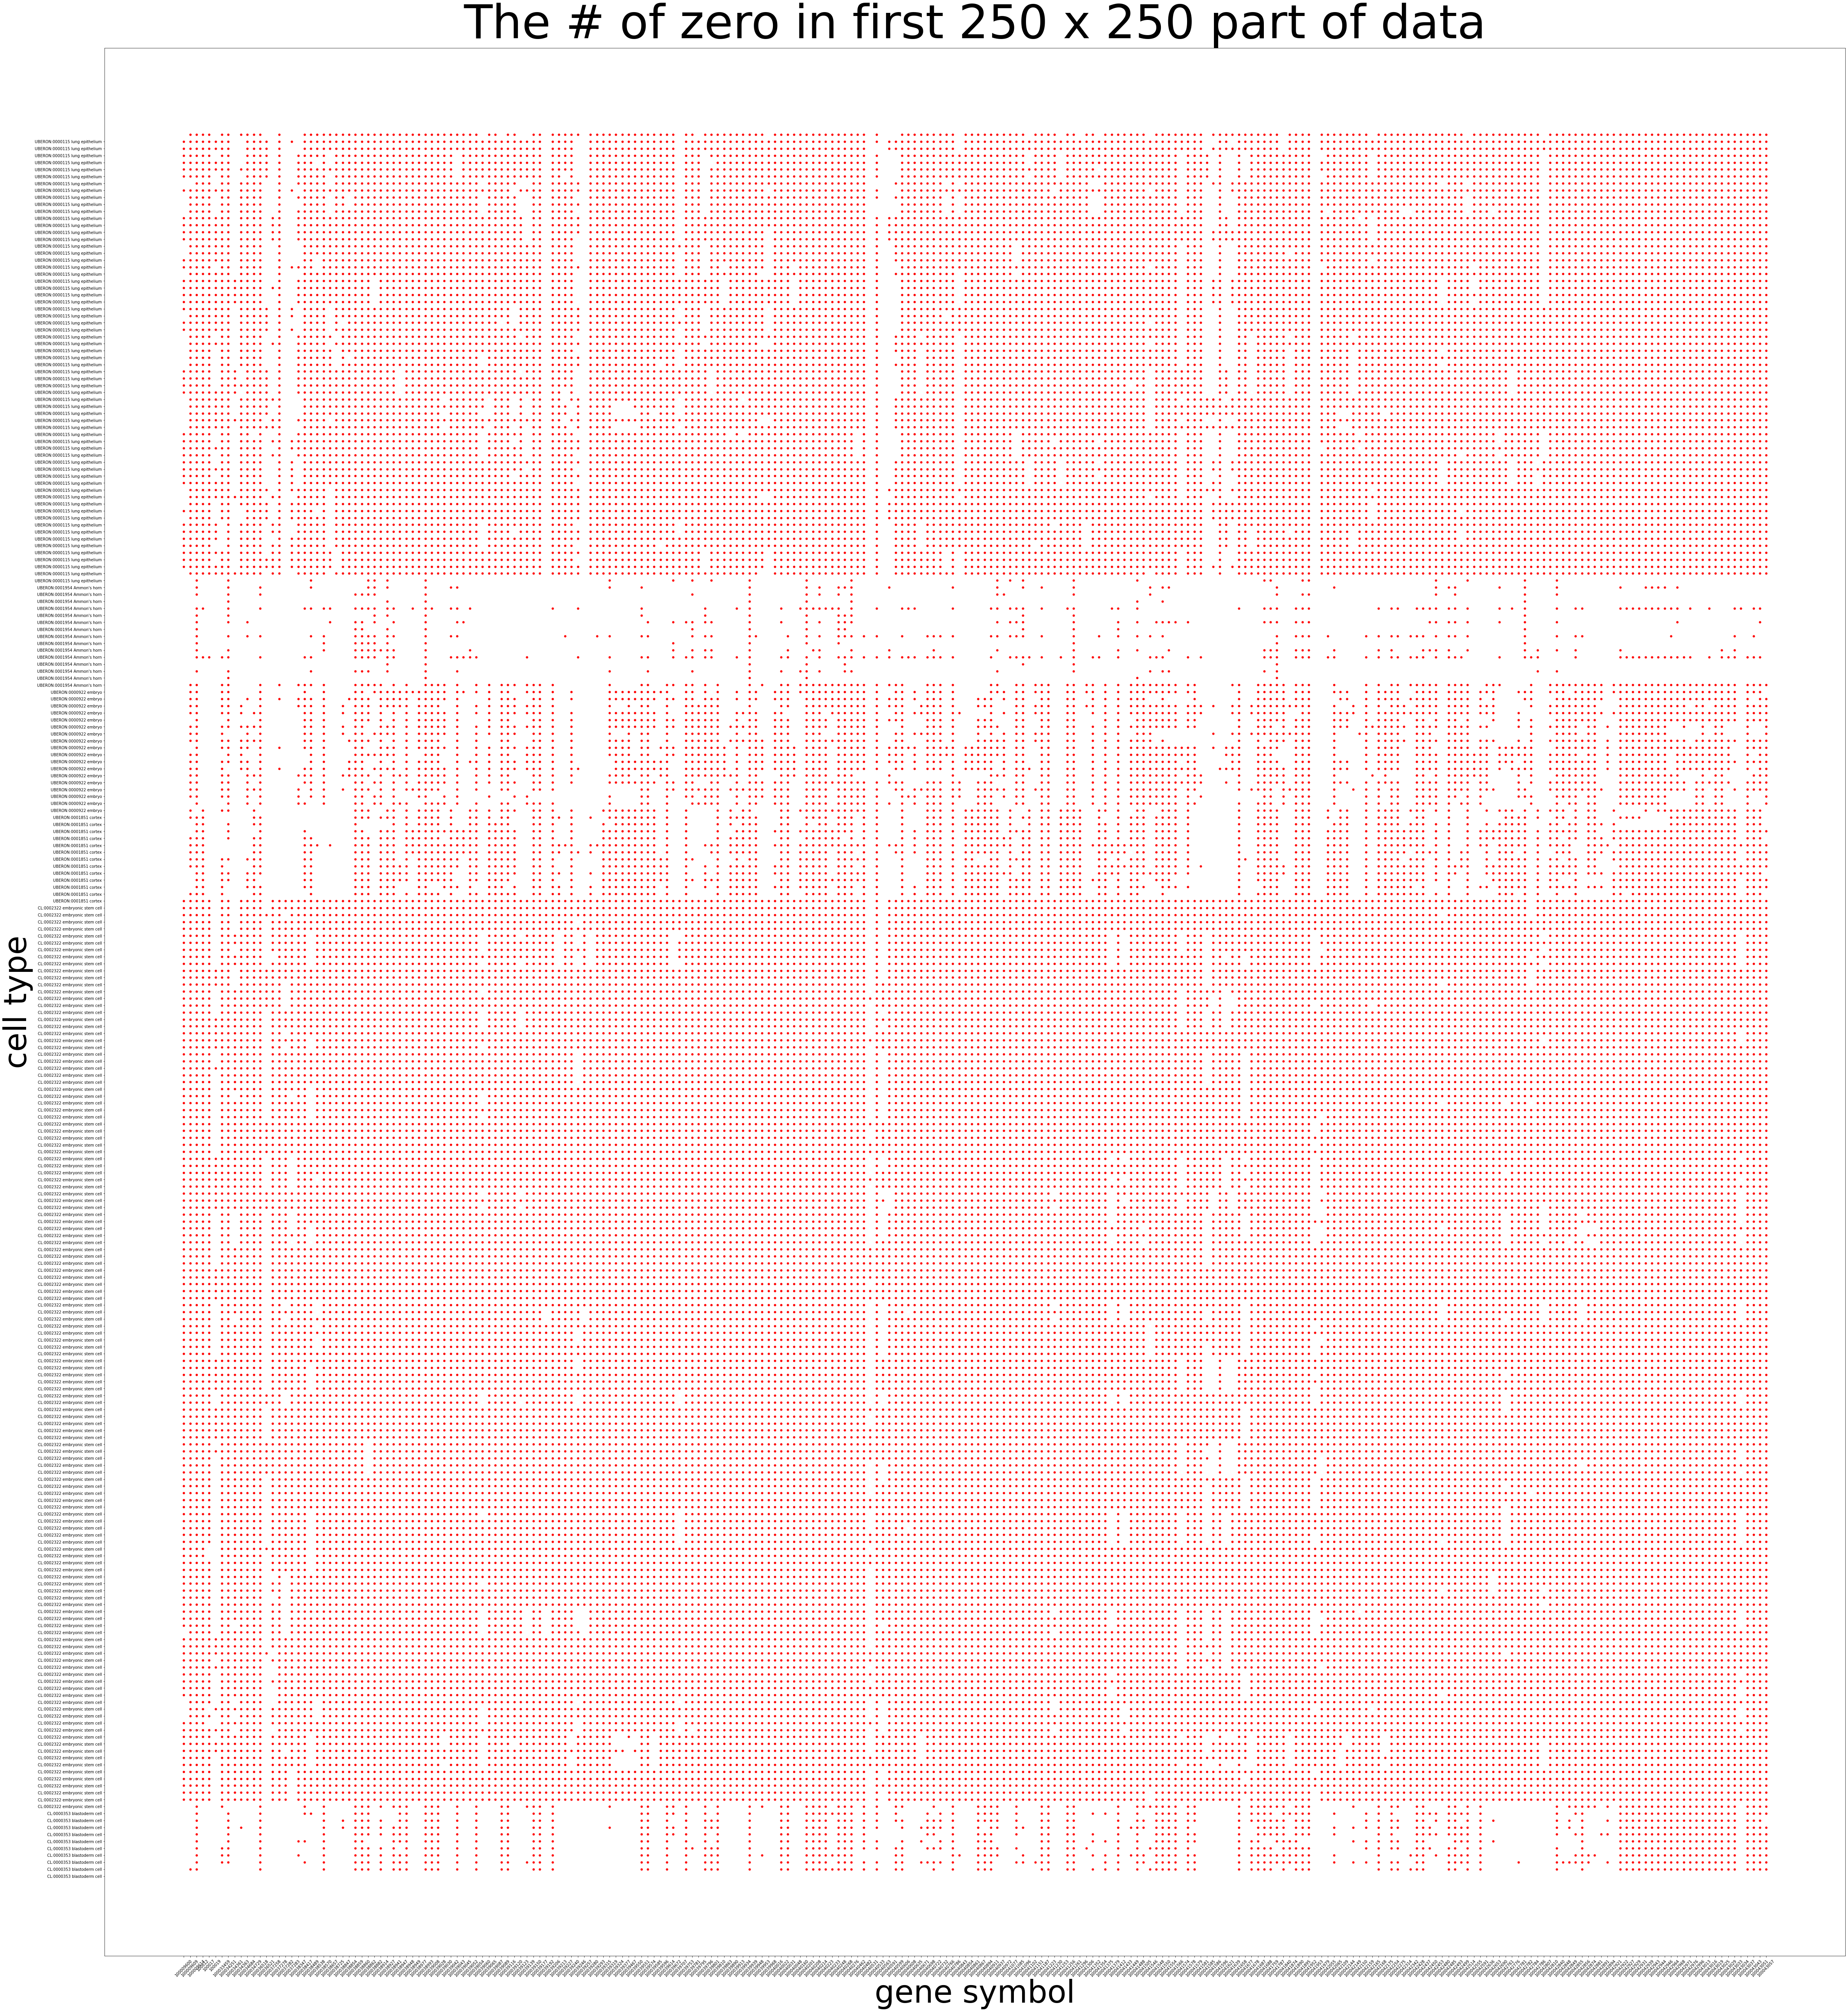

In [13]:
# Draw
Ylabel = list(store['labels'])[:rowTill:]
Xlabel = list(store['rpkm'].keys())[:columnTill:]
title =  'The # of zero in first ' + str(columnTill) + " x " + str(rowTill) + " part of data"
plt.xticks(np.arange(len(Xlabel)), Xlabel,rotation=45)
plt.yticks(np.arange(len(Ylabel)), Ylabel)



ticker_spacing = zeroListX
ticker_spacing = 70

plt.title(title,fontdict={'size': 120}) 
plt.xlabel('gene symbol', fontdict={'weight': 'normal', 'size': 80})
plt.ylabel('cell type', fontdict={'weight': 'normal', 'size': 80})
plt.scatter(zeroListX, zeroListY, s=100, label = '$zero$', c = 'red', marker='.', alpha = None)
plt.gcf().set_size_inches(80, 90)
plt.savefig('test.png',dpi=300)


In [ ]:
store.close()